<a href="https://colab.research.google.com/github/BarkhaKumari-1/PCOS-Detection-ML/blob/main/PCOS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 PCOS Detection using ML (Hierarchical Clustering + GMM)

## 🔹 Project Overview  
Polycystic Ovary Syndrome (**PCOS**) is a common hormonal disorder affecting women's health.  
**Early detection** can help in timely treatment and better health management.  
This project leverages **Machine Learning** to predict PCOS based on medical parameters.  

## 🔹 Why This Project?  
- 🌟 **Early diagnosis** for better treatment outcomes  
- 📊 **Data-driven insights** for medical professionals  
- 🏥 **Helps improve women's healthcare decisions**  

## 🔹 Key Features of the Dataset  
This project analyzes **30+ medical parameters**, including:  
✔ **Age, BMI, Blood Pressure**  
✔ **Hormonal levels (FSH, LH, AMH, PRL, TSH)**  
✔ **Reproductive health indicators (Follicle Count, Endometrium Thickness, Cycle Length)**  

## 🔹 Technologies Used  
💡 **Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-Learn**  


## Library Imports

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


##Upload PCOS DataSet

In [5]:
from google.colab import files
uploaded = files.upload()


Saving PCOS_data.xlsx to PCOS_data (1).xlsx


##Load the dataset into a pandas DataFrame

In [22]:
import pandas as pd

# Check available sheets in the Excel file
excel_file = pd.ExcelFile("PCOS_data.xlsx")
available_sheets = excel_file.sheet_names
print(f"Available sheets: {available_sheets}")


sheet_name = available_sheets[0]
df = pd.read_excel("PCOS_data.xlsx", sheet_name='Full_new')

# Display first few rows
df.head()



Available sheets: ['Instructions', 'Full_new']


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


##Selecting relevant features

In [29]:
features = [' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ', 'RR (breaths/min)',
            'Hb(g/dl)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'No. of aborptions',
            '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)',
            'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)',
            'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)',
            'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
            'Avg. F size (R) (mm)', 'Endometrium (mm)']

Encoding categorical variables

In [30]:
categorical_features = ['Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
                        'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']
for col in categorical_features:
    df[col] = LabelEncoder().fit_transform(df[col])


### *Selecting the required columns*

In [27]:
print(df.columns)

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')


In [34]:
# Clean numeric columns by ensuring correct format
for col in features:
    df[col] = df[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)  # Remove non-numeric characters
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, setting errors as NaN

for col in categorical_features:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df = df.dropna()  # Drop any remaining NaN rows

# Scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


<ipython-input-34-93a41e87044f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)  # Remove non-numeric characters
<ipython-input-34-93a41e87044f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, setting errors as NaN
<ipython-input-34-93a41e87044f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [37]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


##Data Visualization

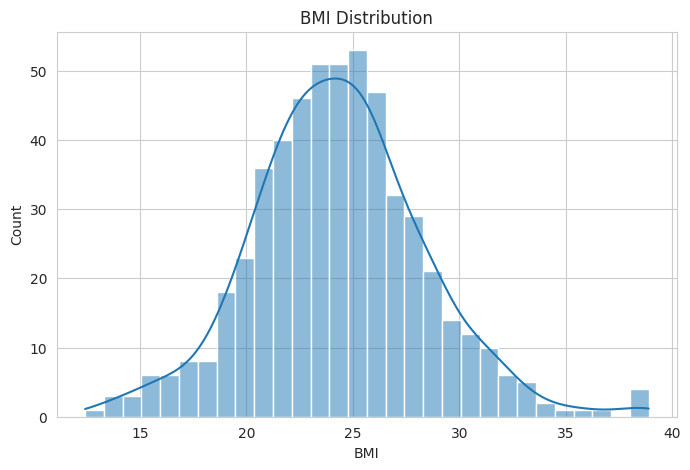

In [52]:
# Set plot style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(8, 5))

# Plot BMI Distribution
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title("BMI Distribution")

# Show only one plot
plt.show()

##Hierarchical Clustering

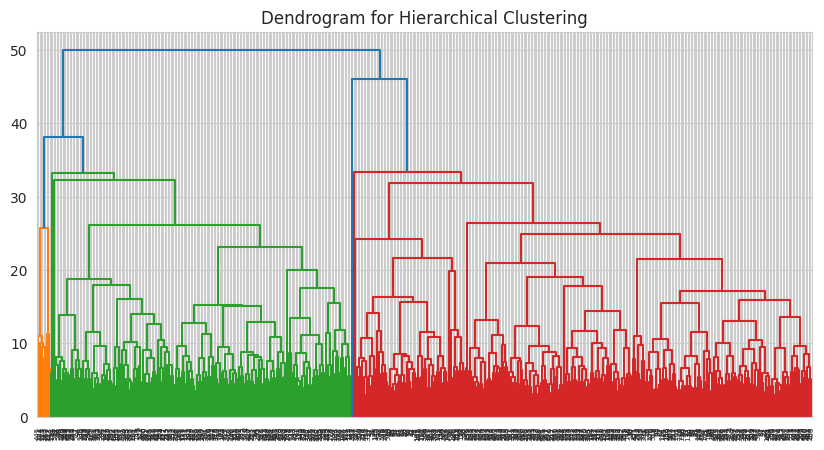

In [53]:
dendrogram_data = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(dendrogram_data)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

num_clusters = 4  # Determine based on dendrogram
hierarchical_labels = fcluster(dendrogram_data, num_clusters, criterion='maxclust')

##Gaussian Mixture Model

In [59]:
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)

In [60]:
print(df['Cluster'].unique())


[3 2 1 0]


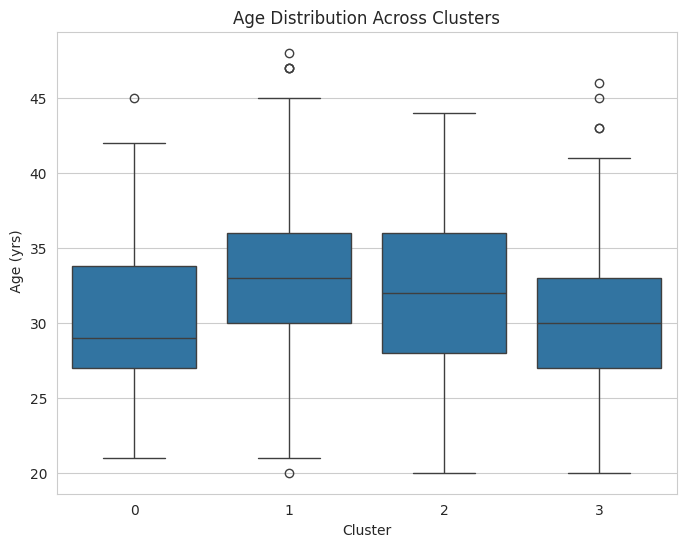

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Cluster'], y=df[' Age (yrs)'])
plt.title("Age Distribution Across Clusters")
plt.show()


##Cluster Evaluation

In [55]:
silhouette_avg = silhouette_score(df_scaled, gmm_labels)
print(f'Silhouette Score for GMM: {silhouette_avg}')


Silhouette Score for GMM: 0.0442583309718384


# Mapping clusters to recommendations

In [56]:
cluster_recommendations = {
    0: "Monitor lifestyle & routine check-ups",
    1: "Diet adjustments & hormonal evaluations",
    2: "Consider medical intervention & treatment",
    3: "Preventive care & stress management"
}
df['Cluster'] = gmm_labels
df['Recommendation'] = df['Cluster'].map(cluster_recommendations)


# Display cluster results

In [57]:
print(df[['Cluster', 'Recommendation']].head())

   Cluster                             Recommendation
0        3        Preventive care & stress management
1        2  Consider medical intervention & treatment
2        1    Diet adjustments & hormonal evaluations
3        2  Consider medical intervention & treatment
4        1    Diet adjustments & hormonal evaluations
